# Mortgage Remove Nulls

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/mortgage_raw.csv')

/Users/scottrosengrants/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,17,18,19,21,22,23,24,25,26,27,28,33,38,39,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,lei,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,preapproval,...,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,549300CUF3Q2PQGM9256,KY,21167,2.1168e+10,C,Conventional:First Lien,Single Family (1-4 Units):Manufactured,1,0,2,...,10,NaN,NaN,NaN,4232,49400,137,1328,1901,32
1,549300CUF3Q2PQGM9256,KY,21211,2.1211e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,1,0,2,...,10,NaN,NaN,NaN,3981,70400,113,1168,1470,23
2,549300CUF3Q2PQGM9256,KY,21239,2.12391e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,3,0,2,...,7,NaN,NaN,NaN,3173,70100,77,457,1098,28
3,549300CUF3Q2PQGM9256,KY,21209,2.1209e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,1,0,2,...,10,NaN,NaN,NaN,2963,70100,163,1013,1164,32
4,549300CUF3Q2PQGM9256,KY,21067,2.1067e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,3,0,2,...,7,NaN,NaN,NaN,3699,70100,109,1293,1720,57


In [4]:
data.columns

Index(['lei', 'state_code', 'county_code', 'census_tract',
       'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'action_taken', 'purchaser_type',
       'preapproval', 'loan_type', 'loan_purpose', 'lien_status',
       'reverse_mortgage', 'open_end_line_of_credit',
       'business_or_commercial_purpose', 'loan_amount',
       'combined_loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units',
       'multifamily_affordable_units', 'income', 'debt_to_income_ratio

### Investigate Loan Purpose
Description: The purpose of covered loan or application
Values: <br>
1 - Home purchase <br>
2 - Home improvement <br>
31 - Refinancing <br>
32 - Cash-out refinancing <br>
4 - Other purpose <br>
5 - Not applicable <br>

**For this analysis only home purchase loans are of interest.**

In [5]:
data['loan_purpose'].value_counts(normalize=True)

1     0.507907
32    0.163457
31    0.153930
2     0.079470
4     0.075584
5     0.019652
Name: loan_purpose, dtype: float64

**Everything but value of 1 (Home purchase) will be dropped**

In [6]:
# drop all rows that do not deal with a new purchase
data = data[data['loan_purpose'] == 1]

In [7]:
# verify change
data['loan_purpose'].value_counts(normalize=True)

1    1.0
Name: loan_purpose, dtype: float64

In [8]:
# the ['loan_purpose'] column can now be dropped, it is no longer necissary 
data.drop(columns = ['loan_purpose'],inplace=True)

### Investigate Reverse Mortgage
Description: Whether the covered loan or application is for a reverse mortgage <br>
Values: <br>
1 - Reverse mortgage <br>
2 - Not a reverse mortgage <br>
1111 - Exempt <br>



In [9]:
data['reverse_mortgage'].value_counts(normalize=True)

2       0.971909
1111    0.027214
1       0.000878
Name: reverse_mortgage, dtype: float64

**Everything but value of 2 (Not a reverse mortgage) will be dropped**

In [10]:
# drop all rows that deal with a reverse mortgage or other loan
data = data[data['reverse_mortgage'] == 2]
#verify change
data['reverse_mortgage'].value_counts(normalize=True)

2    1.0
Name: reverse_mortgage, dtype: float64

In [11]:
# the ['reverse_mortgage'] column can now be dropped, it is no longer necissary 
data.drop(columns = ['reverse_mortgage'],inplace=True)

### Investigate Open-end Line of Credit
Description: Whether the covered loan or application is for an open-end line of credit <br>
Values: <br>
1 - Open-end line of credit <br>
2 - Not an open-end line of credit <br>
1111 - Exempt 

In [12]:
# 'open_end_line_of_credit'
data['open_end_line_of_credit'].value_counts(normalize=True)

2       0.987752
1       0.012237
1111    0.000010
Name: open_end_line_of_credit, dtype: float64

**Everything but value of 2 ( Not an open-end line of credit) will be dropped**

In [13]:
# drop all rows that deal with a line of credit 
data = data[data['open_end_line_of_credit'] == 2]
#verify change
data['open_end_line_of_credit'].value_counts(normalize=True)

2    1.0
Name: open_end_line_of_credit, dtype: float64

In [14]:
# the ['open_end_line_of_credit'] column can now be dropped, it is no longer necissary 
data.drop(columns = ['open_end_line_of_credit'],inplace=True)

### Investigate Business or Commercial Purpose
Description: Whether the covered loan or application is primarily for a business or commercial purpose <br>
Values: <br>
1 - Primarily for a business or commercial purpose <br>
2 - Not primarily for a business or commercial purpose <br>
1111 - Exempt 

In [15]:
#'business_or_commercial_purpose'
data['business_or_commercial_purpose'].value_counts(normalize=True)

2       0.966194
1       0.033789
1111    0.000016
Name: business_or_commercial_purpose, dtype: float64

**Everything but value of 2 (Not primarily for a business or commercial purpose) will be dropped**

In [16]:
# drop all rows that deal with a business or other 
data = data[data['business_or_commercial_purpose'] == 2]
#verify change
data['business_or_commercial_purpose'].value_counts(normalize=True)

2    1.0
Name: business_or_commercial_purpose, dtype: float64

In [17]:
# the ['business_or_commercial_purpose'] column can now be dropped, it is no longer necissary 
data.drop(columns = ['business_or_commercial_purpose'],inplace=True)

In [18]:
data.shape

(4711104, 57)

In [19]:
data.columns

Index(['lei', 'state_code', 'county_code', 'census_tract',
       'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'action_taken', 'purchaser_type',
       'preapproval', 'loan_type', 'lien_status', 'loan_amount',
       'combined_loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units',
       'multifamily_affordable_units', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'co_applicant_credit_score_type',
       'submission_of_application', 

In [20]:
#check target
data['denial_reason_1'].value_counts()

10      4244920
1        137932
3        132259
4         56647
7         41099
9         40700
6         21491
5         20563
2         12647
1111       2309
8           537
Name: denial_reason_1, dtype: int64

## Check for Null Values

In [21]:
data.isnull().sum()

lei                                               0
state_code                                   113852
county_code                                  158593
census_tract                                 191869
conforming_loan_limit                           158
derived_loan_product_type                         0
derived_dwelling_category                         0
action_taken                                      0
purchaser_type                                    0
preapproval                                       0
loan_type                                         0
lien_status                                       0
loan_amount                                       0
combined_loan_to_value_ratio                1743390
interest_rate                               1146250
rate_spread                                 2077242
hoepa_status                                      0
total_loan_costs                            1586637
total_points_and_fees                       4660070
origination_

In [22]:
data.isnull().mean()

lei                                         0.000000
state_code                                  0.024167
county_code                                 0.033664
census_tract                                0.040727
conforming_loan_limit                       0.000034
derived_loan_product_type                   0.000000
derived_dwelling_category                   0.000000
action_taken                                0.000000
purchaser_type                              0.000000
preapproval                                 0.000000
loan_type                                   0.000000
lien_status                                 0.000000
loan_amount                                 0.000000
combined_loan_to_value_ratio                0.370060
interest_rate                               0.243308
rate_spread                                 0.440925
hoepa_status                                0.000000
total_loan_costs                            0.336787
total_points_and_fees                       0.

### Drop Nulls

The aus 1-5 are the underwiting systems utilized. This will be unknown to the end user and many of them contain null values. All 'aus' columns will be dropped. 

'prepayment_penalty_term' is almost entirely nulls, this column will be dropped

'multifamily_affordable_units' is almost entirely nulls, this column will be dropped

'denial reasons 2-4 are almost entirely nulls, they will be dropped (denial reaon 1 will be the target)

In [23]:
to_drop = ['aus_1','aus_2','aus_3','aus_4','aus_5','prepayment_penalty_term','multifamily_affordable_units',
          'denial_reason_2','denial_reason_3','denial_reason_4']
data = data.drop(columns=to_drop)

In [24]:
# check targets
data['denial_reason_1'].value_counts()

10      4244920
1        137932
3        132259
4         56647
7         41099
9         40700
6         21491
5         20563
2         12647
1111       2309
8           537
Name: denial_reason_1, dtype: int64

#### Remove missing rows with missing geolocal info

In [25]:
# drop 'state_code', 'county_code', 'census_tract' null rows
data.dropna(subset=['state_code', 'county_code', 'census_tract'],inplace=True)

In [26]:
# check targets
data['denial_reason_1'].value_counts()

10      4152085
1        106588
3         84823
4         55716
7         35091
9         31105
5         17547
6         16903
2         10147
1111       2172
8           469
Name: denial_reason_1, dtype: int64

#### Investigate the 'conforming_loan_limit' column

In [27]:
data['conforming_loan_limit'].value_counts()

C     4263632
NC     248866
Name: conforming_loan_limit, dtype: int64

There are few nulls in this column and they could be dropped. Calculating this column is possible given a cross reference of the census tract location and the corresponding GSE (government sponsored enterprise) conforming loan limit, which is publically available. However, this exceeds the scope of this project so the column will be dropped all together. 

In [28]:
# drop 'conforming_loan_limit'
data.drop(columns=['conforming_loan_limit'],inplace=True)

In [29]:
# check targets
data['denial_reason_1'].value_counts()

10      4152085
1        106588
3         84823
4         55716
7         35091
9         31105
5         17547
6         16903
2         10147
1111       2172
8           469
Name: denial_reason_1, dtype: int64

#### Investigate the 'combined_loan_to_value_ratio' column

In [30]:
# determine how many high ltv loans (excluding nulls)
ltv = pd.to_numeric(data['combined_loan_to_value_ratio'], errors='coerce')
sum(ltv > 105) / len(ltv)

0.00370403528218256

Loan to value typically has a very large impact on the approval rating of a loan, therefore all null rows will be dropped. 

In [31]:
# drop null rows
data.dropna(subset=['combined_loan_to_value_ratio'],inplace=True)

In [32]:
# check targets
data['denial_reason_1'].value_counts()

10      2582456
1         80810
4         52450
3         45314
7         29833
9         25534
6         15505
5         15112
2          8265
1111       1791
8           436
Name: denial_reason_1, dtype: int64

In [33]:
# check the remaining size of the data
data.shape

(2857506, 46)

#### Investigate the 'interest_rate' column|

In [34]:
# look at values
data['interest_rate'].value_counts()

4.75     144239
4.75     142629
4.875    133678
4.875    132522
4.625    131286
          ...  
4.537         1
7.59          1
9.34          1
4.802         1
3.146         1
Name: interest_rate, Length: 3388, dtype: int64

In [35]:
# check the denial counts based on interest rate being null
data[data['interest_rate'].isnull()]['denial_reason_1'].value_counts()

1       80809
4       52450
3       45314
7       29833
9       25534
10      24443
6       15505
5       15112
2        8265
1111      575
8         436
Name: denial_reason_1, dtype: int64

In [36]:
# check the denial counts based on interest rate being valid values
data[data['interest_rate'].notnull()]['denial_reason_1'].value_counts()

10      2558013
1111       1216
1             1
Name: denial_reason_1, dtype: int64

In [37]:
# convert the objects to floats
rates = pd.to_numeric(data['interest_rate'], errors='coerce')

In [38]:
#check min
rates.min()

0.001

In [39]:
# check max
rates.max()

154755.0

In [40]:
# check high values
rates.sort_values(ascending=False)[:30]

8788530    154755.0
678269      43875.0
2752622     40375.0
2752709     40125.0
933821       7750.0
933777       7750.0
933767       6540.0
933762       6250.0
933829       5500.0
9698789      5375.0
933826       5250.0
2739822      5250.0
9653185      5125.0
9657346      5125.0
9679732      4875.0
2739865      4750.0
2739960      4750.0
933855       4590.0
933747       4500.0
933795       4500.0
9580727      4375.0
9564300      4125.0
933728       3990.0
9665470      3625.0
9676904       499.0
1844571       475.0
9564305       449.0
2621474       433.0
9579102       425.0
9657334       425.0
Name: interest_rate, dtype: float64

In [41]:
#remove outliers
rates = rates[rates < 10]

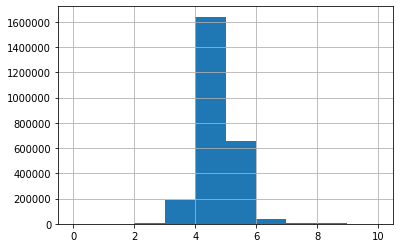

In [42]:
rates.hist()

The interest rates that contain null values also contain all of the not-approved loans (a component of the target). The null rows can thus not be removed. Likely these records (applications) were rejected prior to being assigned an interest rate which could be why they are null. These null values will be replaced with the median interest rate. This assumes, had these applications been accepted, that they would have received a rate consistent with the other applications. 

Additionally several interest rates are over 100% which does not make sense in the terms of lending. Any rate over 10% will be removed.

In [43]:
# change the objects to floats in the df
data['interest_rate'] = pd.to_numeric(data['interest_rate'], errors='coerce')

In [44]:
# count nulls
data['interest_rate'].isnull().sum()

298368

In [45]:
# find median interest rate
data['interest_rate'].median()

4.75

In [46]:
# set all null values to the median interest rate
data['interest_rate'].fillna(data['interest_rate'].median(), inplace=True)

In [47]:
# remove interest rate outliers (anything above 10%) for the entire df
data = data[data['interest_rate'] < 10]

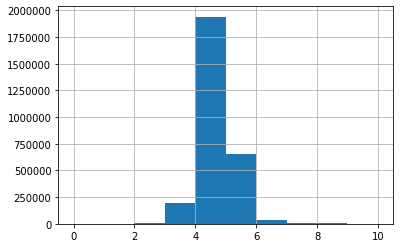

In [48]:
data['interest_rate'].hist()

In [49]:
# check targets
data['denial_reason_1'].value_counts(normalize=True)

10      0.903716
1       0.028288
4       0.018361
3       0.015863
7       0.010443
9       0.008938
6       0.005428
5       0.005290
2       0.002893
1111    0.000627
8       0.000153
Name: denial_reason_1, dtype: float64

#### Investigate the 'rate_spread' column

Description: The difference between the covered loan’s annual percentage rate (APR) and the average prime offer rate (APOR) for a comparable transaction as of the date the interest rate is set

**The rate spread will not be able to be calculated and provided to the model by the user, the column will be dropped.**

In [50]:
# drop 'rate_spread'
data.drop(columns=['rate_spread'],inplace=True)

In [51]:
# check targets
data['denial_reason_1'].value_counts(normalize=True)

10      0.903716
1       0.028288
4       0.018361
3       0.015863
7       0.010443
9       0.008938
6       0.005428
5       0.005290
2       0.002893
1111    0.000627
8       0.000153
Name: denial_reason_1, dtype: float64

#### Investigate the loan cost columns : 
**'total_loan_costs',  'total_points_and_fees', 'origination_charges', 'discount_points', 'lender_credits', 'loan_term', 'intro_rate_period'**

In [52]:
data['total_loan_costs'].value_counts()

0.0        25102
0.0        14257
500.0       7391
500.0       1540
450.0       1452
           ...  
9547.02        1
4751.12        1
7513.24        1
7512.99        1
5892.16        1
Name: total_loan_costs, Length: 1160585, dtype: int64

Total loan costs will not be something the end user can provide. This column will be dropped entirely.

In [53]:
# drop 'total_loan_costs'
data.drop(columns=['total_loan_costs'],inplace=True)

In [54]:
# check targets
data['denial_reason_1'].value_counts(normalize=True)

10      0.903716
1       0.028288
4       0.018361
3       0.015863
7       0.010443
9       0.008938
6       0.005428
5       0.005290
2       0.002893
1111    0.000627
8       0.000153
Name: denial_reason_1, dtype: float64

In [55]:
data['total_points_and_fees'].value_counts()

749.0      588
0.0        560
499.0      555
0.0        347
800.0      320
          ... 
1564.58      1
1413.63      1
1190.31      1
1316.97      1
1831.5       1
Name: total_points_and_fees, Length: 19363, dtype: int64

Total points and fees costs will not be something the end user can provide. This column will be dropped entirely.

In [56]:
# drop 'total_points_and_fees'
data.drop(columns=['total_points_and_fees'],inplace=True)

In [57]:
# check targets
data['denial_reason_1'].value_counts(normalize=True)

10      0.903716
1       0.028288
4       0.018361
3       0.015863
7       0.010443
9       0.008938
6       0.005428
5       0.005290
2       0.002893
1111    0.000627
8       0.000153
Name: denial_reason_1, dtype: float64

In [58]:
data['origination_charges'].value_counts()

0.0        229729
0.0        157891
1290.0      34146
995.0       31343
995.0       28263
            ...  
1010.91         1
1378.85         1
1414.17         1
3770.88         1
5620.59         1
Name: origination_charges, Length: 498309, dtype: int64

In [59]:
# check the denial counts based on interest rate being null
data[data['origination_charges'].isnull()]['denial_reason_1'].value_counts()

10      159964
1        80809
4        52450
3        45314
7        29833
9        25534
6        15505
5        15112
2         8265
1111      1176
8          436
Name: denial_reason_1, dtype: int64

Origination charges are not calculated for loan applications get rejected. The null values in 'origination_charges' consist of all of the targets (rejected loan applications. Therefore the column will be dropped entirely. 

In [60]:
# drop 'origination_charges'
data.drop(columns=['origination_charges'],inplace=True)

In [61]:
# check targets
data['denial_reason_1'].value_counts(normalize=True)

10      0.903716
1       0.028288
4       0.018361
3       0.015863
7       0.010443
9       0.008938
6       0.005428
5       0.005290
2       0.002893
1111    0.000627
8       0.000153
Name: denial_reason_1, dtype: float64

In [62]:
data['discount_points'].value_counts()

500.0      824
750.0      709
1000.0     708
500.0      696
750.0      629
          ... 
499.82       1
4783.63      1
949.13       1
3667.4       1
1552.51      1
Name: discount_points, Length: 308599, dtype: int64

Discount points will not be something the end user can provide and contains null amounts for the majority of the rows. This column will be dropped entirely.

In [63]:
# drop 'discount_points'
data.drop(columns=['discount_points'],inplace=True)

In [64]:
data['lender_credits'].value_counts()

500.0       16748
250.0        8147
1000.0       7522
25.0         7438
100.0        6952
            ...  
1632.7          1
223.41          1
2318.97         1
12327.04        1
166.35          1
Name: lender_credits, Length: 247567, dtype: int64

In [65]:
# check the denial counts based on lender_credis being null
data[data['lender_credits'].isnull()]['denial_reason_1'].value_counts()

10      1662628
1         80808
4         52449
3         45312
7         29833
9         25534
6         15505
5         15112
2          8265
1111       1661
8           436
Name: denial_reason_1, dtype: int64

Again, loans that are not approved do not have lender credits assigned to them. This field will be dropped.

In [66]:
# drop 'lender_credits'
data.drop(columns=['lender_credits'],inplace=True)

In [67]:
# check targets
data['denial_reason_1'].value_counts(normalize=True)

10      0.903716
1       0.028288
4       0.018361
3       0.015863
7       0.010443
9       0.008938
6       0.005428
5       0.005290
2       0.002893
1111    0.000627
8       0.000153
Name: denial_reason_1, dtype: float64

In [68]:
# check loan term
data['loan_term'].value_counts()

360.0    1363712
360      1008846
360.0     247003
180        59014
180.0      57959
          ...   
244            1
39             1
295            1
385            1
296.0          1
Name: loan_term, Length: 727, dtype: int64

In [69]:
# check the denial counts based on loan_term being null
data[data['loan_term'].isnull()]['denial_reason_1'].value_counts()

10    4014
3      319
1      172
4       95
9       73
5       39
6       36
2       27
7       25
8        3
Name: denial_reason_1, dtype: int64

In [70]:
#converts objects to floats
data['loan_term'] = pd.to_numeric(data['loan_term'], errors='coerce')

In [71]:
sum(data['loan_term'] < 180) / len(data['loan_term'])

0.013112502244752007

Less than a 1% of loan terms are null, and less than 2% are less than 180 months. All nulls and loans under 180 months will be removed

In [72]:
# drop rows with null 'loan_term' values
data.dropna(subset=['loan_term'],inplace=True)

In [73]:
# check targets
data['denial_reason_1'].value_counts(normalize=True)

10      0.903854
1       0.028276
4       0.018359
3       0.015778
7       0.010452
9       0.008928
6       0.005424
5       0.005285
2       0.002889
1111    0.000602
8       0.000152
Name: denial_reason_1, dtype: float64

In [74]:
# remove rows with less than 180 month loan_terms
data = data[data['loan_term'] >= 180]

In [75]:
# check targets
data['denial_reason_1'].value_counts(normalize=True)

10      0.904217
1       0.028170
4       0.018309
3       0.015620
7       0.010476
9       0.008842
6       0.005437
5       0.005296
2       0.002886
1111    0.000597
8       0.000149
Name: denial_reason_1, dtype: float64

In [76]:
data['intro_rate_period'].value_counts()

60       31704
84.0     26043
84       19105
60.0     18923
120.0    13321
         ...  
420.0        1
15.0         1
95.0         1
99           1
366          1
Name: intro_rate_period, Length: 295, dtype: int64

Intro rate period is almost entirely null, the column will be dropped

In [77]:
# drop 'intro_rate_period'
data.drop(columns=['intro_rate_period'],inplace=True)

In [78]:
# check the denial counts based on loan_term being null
data[data['property_value'].isnull()]['denial_reason_1'].value_counts()

10    4804
1     3244
7     2175
9     1671
3     1624
2      631
5      484
4      433
6      215
8        8
Name: denial_reason_1, dtype: int64

In [79]:
#converts objects to floats
data['property_value'] = pd.to_numeric(data['property_value'], errors='coerce')

In [80]:
data['property_value'].min()

5000.0

In [81]:
data['property_value'].max()

2147483647.0

In [82]:
data['property_value'].sort_values(ascending=False)

1572027    2.147484e+09
1570940    2.147484e+09
1568278    2.147484e+09
8800265    5.300050e+08
8296125    1.540050e+08
               ...     
9840076             NaN
9840084             NaN
9850117             NaN
9850142             NaN
9889928             NaN
Name: property_value, Length: 2814317, dtype: float64

In [83]:
data[data['property_value'] > 2_000_000_000]

,lei,state_code,county_code,census_tract,derived_loan_product_type,derived_dwelling_category,action_taken,purchaser_type,preapproval,loan_type,...,co_applicant_credit_score_type,submission_of_application,initially_payable_to_institution,denial_reason_1,tract_population,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
1568278,549300BEFX6JRSCS5N78,FL,12097,1.2097e+10,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,0,2,1,...,10,1,1,10,7177,62900,62,1129,2786,18
1570940,549300BEFX6JRSCS5N78,AR,5031,5.031e+09,Conventional:First Lien,Single Family (1-4 Units):Site-Built,1,71,2,1,...,9,1,1,10,6966,53100,219,2215,2659,16
1572027,549300BEFX6JRSCS5N78,OK,40135,4.0135e+10,FHA:First Lien,Single Family (1-4 Units):Site-Built,1,71,2,2,...,10,1,1,10,3698,52400,87,1156,1701,28


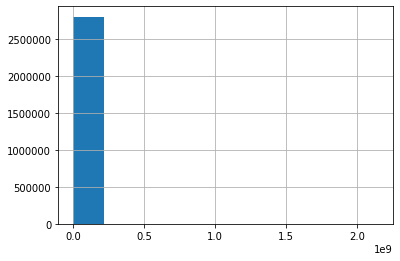

In [84]:
data['property_value'].hist()

In [85]:
# replace nulls with 0 (to be dealt with in EDA)
data['property_value'].fillna(0,inplace=True)

In [86]:
#converts objects to floats
data['income'] = pd.to_numeric(data['income'], errors='coerce')

In [87]:
data['income'].min()

-8824.0

In [88]:
data['income'].max()

1625814.0

In [89]:
data['income'].sort_values(ascending=False)

680921     1625814.0
4157553     771960.0
1125465     420000.0
3284971     381000.0
3284904     285000.0
             ...    
9974742          NaN
9974774          NaN
9975316          NaN
9975454          NaN
9977037          NaN
Name: income, Length: 2814317, dtype: float64

In [90]:
sum(data['income'] == 0)

15955

In [91]:
# check the denial counts based on loan_term being null
data[data['income'].isnull()]['denial_reason_1'].value_counts()

10      25141
1        1023
1111      660
4         615
3         357
6         302
2         234
9         221
5         118
7         110
Name: denial_reason_1, dtype: int64

The rows with null values in 'income' also contain many of the target (denial_reason) and can not simply be dropped. They will be assigned a value of 999 and be further analyzed in the EDA section.

In [92]:
# replace nulls with 999 (to be dealt with in EDA)
data['income'].fillna(999,inplace=True)

In [93]:
# check the denial counts based on loan_term being null
data[data['debt_to_income_ratio'].isnull()]['denial_reason_1'].value_counts()

10      7276
1        707
3        630
4        627
9        458
6        256
7        175
5        174
2        161
1111       4
Name: denial_reason_1, dtype: int64

In [94]:
#converts objects to floats
data['debt_to_income_ratio'] = pd.to_numeric(data['debt_to_income_ratio'], errors='coerce')

In [95]:
data['debt_to_income_ratio'].max()

49.0

In [96]:
data['debt_to_income_ratio'].min()

36.0

In [97]:
# check the denial counts based on loan_term being not null
data[data['debt_to_income_ratio'].notnull()]['denial_reason_1'].value_counts()

10      1336080
4         25600
3         18061
1         16620
7         14825
9         11801
5          8125
6          7317
2          3323
1111        703
8           227
Name: denial_reason_1, dtype: int64

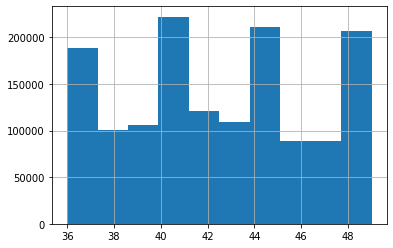

In [106]:
data[data['debt_to_income_ratio'].notnull()]['debt_to_income_ratio'].hist()
plt.savefig('../plt.png')

<BarContainer object of 2 artists>

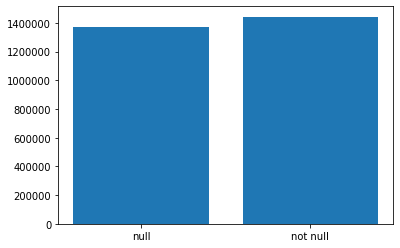

In [105]:
null = len(data[data['debt_to_income_ratio'].isnull()])
not_null = len(data[data['debt_to_income_ratio'].notnull()])
plt.bar(['null','not null'],[null,not_null])

In [701]:
# replace nulls with 100 (to be dealt with in EDA)
data['debt_to_income_ratio'].fillna(100,inplace=True)

In [702]:
data.isnull().mean().sum()

0.0

In [703]:
#check for balanced state representation
data['state_code'].value_counts(normalize=True)

CA    0.097599
TX    0.085284
FL    0.076559
IL    0.038994
NC    0.038251
OH    0.036807
NY    0.036733
GA    0.034812
AZ    0.034333
PA    0.033450
MI    0.030297
WA    0.028464
NJ    0.027067
CO    0.026638
VA    0.025998
IN    0.023578
TN    0.021283
MA    0.019966
MN    0.019434
MD    0.019426
WI    0.018181
MO    0.017705
UT    0.017205
SC    0.015867
OR    0.015497
KY    0.012498
NV    0.012474
AL    0.011744
OK    0.011101
CT    0.010938
LA    0.010854
ID    0.009151
AR    0.008654
KS    0.008342
IA    0.007747
NM    0.006248
NE    0.005894
MS    0.005867
NH    0.004651
MT    0.003767
DE    0.003576
ME    0.003446
RI    0.003350
WV    0.003263
SD    0.003053
HI    0.002639
VT    0.002068
WY    0.002065
ND    0.002020
PR    0.001783
AK    0.001735
DC    0.001641
GU    0.000005
Name: state_code, dtype: float64

In [704]:
# check targets
data['denial_reason_1'].value_counts(normalize=True)

10      0.904217
1       0.028170
4       0.018309
3       0.015620
7       0.010476
9       0.008842
6       0.005437
5       0.005296
2       0.002886
1111    0.000597
8       0.000149
Name: denial_reason_1, dtype: float64

In [705]:
# check targets
data['denial_reason_1'].value_counts()

10      2544754
1         79280
4         51526
3         43961
7         29484
9         24883
6         15301
5         14905
2          8122
1111       1681
8           420
Name: denial_reason_1, dtype: int64

In [706]:
data.shape

(2814317, 39)

In [707]:
# export cleaned data to data folder
data.to_csv('data/mortgage_clean.csv',index=False)